## 2012.1.1 - 2017.9.2 Baltimore Victim-Based Crime exploratory data analysis


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# read in kaggle 2012-2017 dataset
df = pd.read_csv("Resources/BPD_Part_1_Victim_Based_Crime_Data.csv")
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,9/2/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,9/2/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,9/2/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,9/2/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,9/2/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


## Data cleaning and preparation

Post and CrimeCode dropped. Inside/Ouside cleaned. "Time of Day" and "Day of Week" series added. No null values have been dropped (for example, there are 10,000 nulls in "Inside/Outside", or 3% of the data). 


In [4]:
# data cleaning and organization

# remove series
df.drop(columns=["CrimeCode", "Post"], inplace=True)

# consolidate Inside/Outside values, merging "O" and "I" with "Outside" and "Inside"
df["Inside/Outside"] = df["Inside/Outside"].replace({"Outside": "O", "Inside": "I"})

# convert day to datetime data type
df.CrimeDate = pd.to_datetime(df.CrimeDate)

# change midnight for to_datetime
# create temp series CrimeTimeTemp for splitting data into Time of Day
df.loc[df.CrimeTime == "24:00:00", "CrimeTime"] = "00:00:00"
df["CrimeTimeTemp"] = pd.to_datetime(df.CrimeTime, format="%H:%M:%S")

# create bins and labels for morning, afternoon, evening, late night
# -1 because it kept populating "Time of Day" with NaN for any 0 hours (12am)
bins = [-1, 6, 12, 18, 24]
labels = ["Late Night", "Morning", "Afternoon", "Evening"]

# pd.cut likes ints, so dt.hour extracts the hour for comparison with bins
# remove CrimeTimeTemp from the df
df["Time of Day"] = pd.cut(df.CrimeTimeTemp.dt.hour, bins=bins, labels=labels)
# df.drop(columns=["CrimeTimeTemp"], inplace=True)

# add 'Day of Week' series
df["Day of Week"] = df["CrimeDate"].dt.day_name()

In [5]:
df

,CrimeDate,CrimeTime,Location,Description,Inside/Outside,Weapon,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,CrimeTimeTemp,Time of Day,Day of Week
0,2017-09-02,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,1900-01-01 23:30:00,Evening,Saturday
1,2017-09-02,23:00:00,800 NEWINGTON AVE,AUTO THEFT,O,NaN,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,1900-01-01 23:00:00,Evening,Saturday
2,2017-09-02,22:53:00,600 RADNOR AV,SHOOTING,O,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1,1900-01-01 22:53:00,Evening,Saturday
3,2017-09-02,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,1900-01-01 22:50:00,Evening,Saturday
4,2017-09-02,22:31:00,100 LIGHT ST,COMMON ASSAULT,O,HANDS,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,1900-01-01 22:31:00,Evening,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,2012-01-01,0:00:00,1400 JOH AVE,LARCENY,I,NaN,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1,1900-01-01 00:00:00,Late Night,Sunday
276525,2012-01-01,0:00:00,5500 SINCLAIR LN,LARCENY,O,NaN,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1,1900-01-01 00:00:00,Late Night,Sunday
276526,2012-01-01,0:00:00,400 N PATTERSON PK AV,LARCENY,O,NaN,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1,1900-01-01 00:00:00,Late Night,Sunday
276527,2012-01-01,0:00:00,5800 LILLYAN AV,BURGLARY,I,NaN,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1,1900-01-01 00:00:00,Late Night,Sunday


## Crime by Time of Day (a.k.a., most popular morning crime)

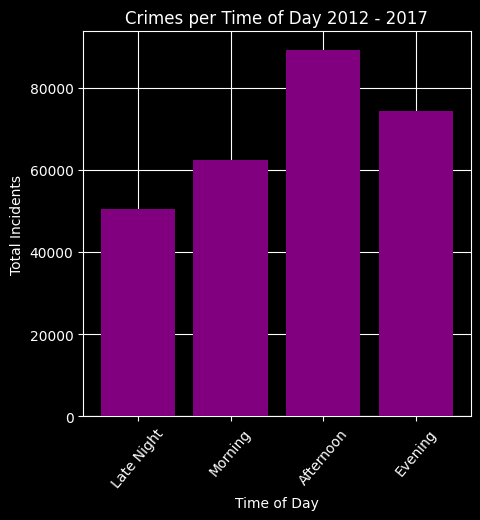

In [29]:
crime_tod = df.groupby('Time of Day').size().reset_index(name = 'Total_Crimes')

plt.figure(figsize=(5, 5))
plt.bar(crime_tod["Time of Day"], crime_tod["Total_Crimes"], color ="purple", zorder = 3 )

plt.xlabel('Time of Day')
plt.title("Crimes per Time of Day 2012 - 2017")
plt.ylabel("Total Incidents")
plt.xticks(rotation=50)
#plt.gca().set_facecolor('grey')

# Set categorical order
crime_tod['Time of Day'] = pd.Categorical(crime_tod['Time of Day'],
                                   categories=['Morning', 'Afternoon', 'Evening', 'Late Night'],
                                   ordered=True)
#crime_tod = crime_tod.reindex(["Morning", "Afternoon", "Evening", "Late Night"] color ='purple', zorder = 3)
#crime_tod.plot.bar(edgecolor="black")

# Change and format bar style
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('dark_background')
plt.grid()
plt.grid(zorder=0)

plt.show()


In [44]:
# # plt.pie(
# #     crime_tod.values,
# #     labels=crime_tod.index,
# #     explode=(0.03, 0.15, 0.03, 0.03),
# #     shadow=True,
# #     startangle=160,
# #     autopct="%1.2f%%",
# #     pctdistance=0.8,
# #     counterclock=False,
# )


colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(crime_tod, labels=crime_tod, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Crime by Time of Day 2012 - 2017")

# # gcf get current figure, gca get current axis
# donut = plt.Circle((0, 0), 0.65, facecolor="white")
# plt.gcf().gca().add_artist(donut)

plt.show()

ValueError: could not convert string to float: 'Late Night'

## Breakdown time over years


In [33]:
# unstack pivots the table
x = df.groupby([df["CrimeDate"].dt.year, "Time of Day"]).size().unstack()

x.plot(kind='line')

# note that 2017 only contains data for 2/3's of a year (through the beginning of September)

<Axes: xlabel='CrimeDate'>

In [9]:
# holy shit! a successful ANOVA! time does impact crime level by time of day
pre2017_df = df[df["CrimeDate"].dt.year < 2017]

m = pre2017_df[pre2017_df["Time of Day"] == "Morning"].groupby(pre2017_df["CrimeDate"].dt.year).size()
a = pre2017_df[pre2017_df["Time of Day"] == "Afternoon"].groupby(pre2017_df["CrimeDate"].dt.year).size()
e = pre2017_df[pre2017_df["Time of Day"] == "Evening"].groupby(pre2017_df["CrimeDate"].dt.year).size()
n = pre2017_df[pre2017_df["Time of Day"] == "Late Night"].groupby(pre2017_df["CrimeDate"].dt.year).size()

st.f_oneway(m, a, e, n)

F_onewayResult(statistic=181.68417620148915, pvalue=1.4417942015211965e-12)

# Inside/Outside

<Axes: xlabel='CrimeTimeTemp'>

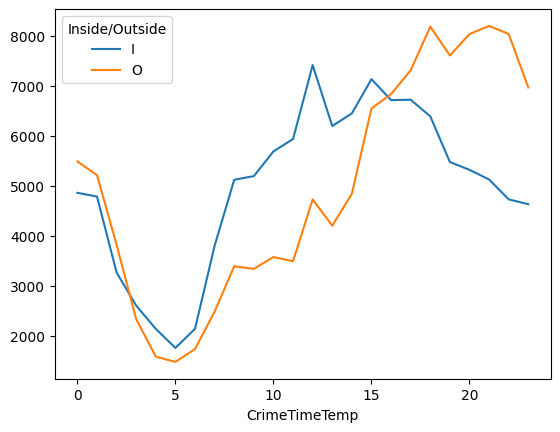

In [10]:
# unstack pivots the table
x = pre2017_df.groupby([pre2017_df["CrimeTimeTemp"].dt.hour, "Inside/Outside"]).size().unstack()

x.plot(kind='line')


In [11]:
# holy shit! another successful ANOVA! time of day does not impact crime level in/out

m = df[df["Time of Day"] == "Morning"].groupby(df["Inside/Outside"]).size()
a = df[df["Time of Day"] == "Afternoon"].groupby(df["Inside/Outside"]).size()
e = df[df["Time of Day"] == "Evening"].groupby(df["Inside/Outside"]).size()
n = df[df["Time of Day"] == "Late Night"].groupby(df["Inside/Outside"]).size()

st.f_oneway(m, a, e, n)

F_onewayResult(statistic=2.5018363212325165, pvalue=0.19835815971583926)